<a href="https://colab.research.google.com/github/Aadivk/Data-Analysis-using-Python/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project** :- Movie Recommendation System


# **Objective :-**
Build a personalized movie recommendation system that suggests movies to users based on their preferences and watch history, utilizing Python data analysis and machine learning algorithms

# **Data Source**

Taking datasets from github YBI-Foundation Dataset



# **Import library**

In [221]:
# Import library
import pandas as pd
import numpy as np

In [3]:
# Import data
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv')

In [4]:
# Describe data
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [5]:
df.shape

(4760, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [7]:
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [15]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

# **Data preprocessing**

In [81]:
# Data preprocessing
df.isnull()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4756,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4757,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4758,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,True,False,True


In [132]:
df_features=df.fillna('')

In [133]:
df_features.isnull().sum()

,0
Movie_ID,0
Movie_Title,0
Movie_Genre,0
Movie_Language,0
Movie_Budget,0
Movie_Popularity,0
Movie_Release_Date,0
Movie_Revenue,0
Movie_Runtime,0
Movie_Vote,0


In [93]:
df_features.shape

(4760, 21)

# **Data Visualization**

In [26]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

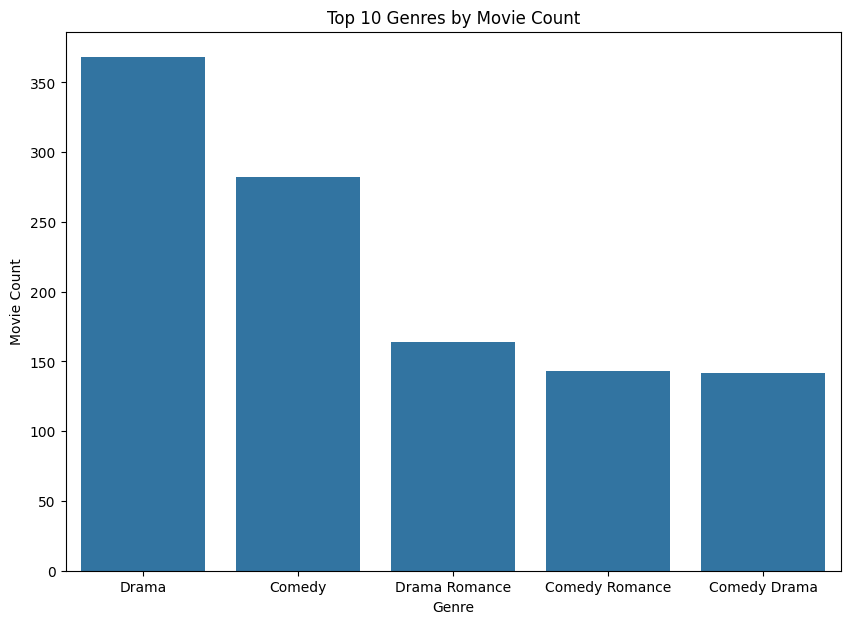

In [75]:
#Genre Distribution (Top 5)
top_10_genres = df['Movie_Genre'].value_counts().head(5)
plt.figure(figsize=(10,7))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Genre')
plt.ylabel('Movie Count')
plt.show()

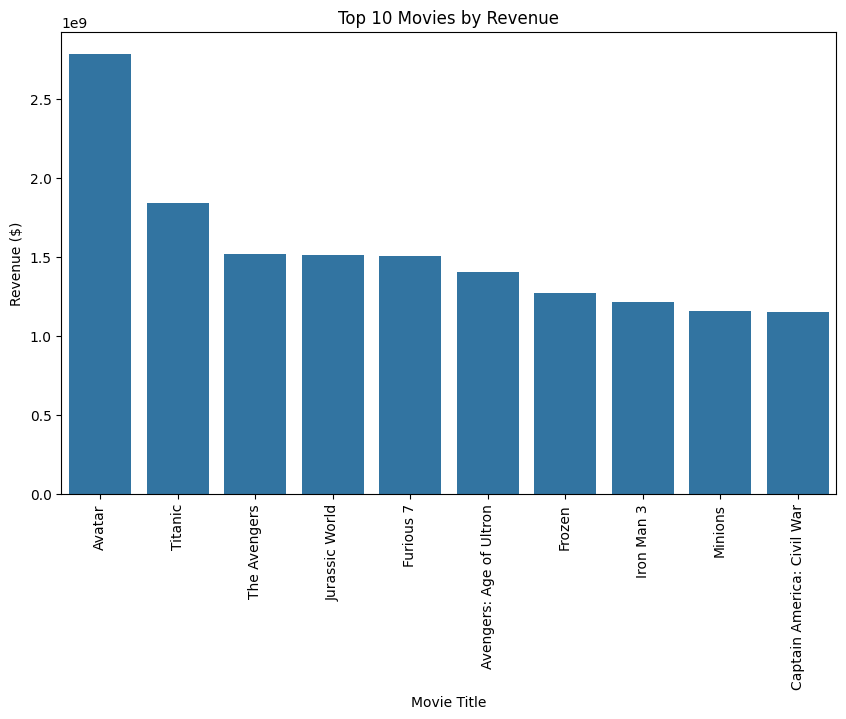

In [76]:
#Budget vs. Revenue (Top 10)
top_10_movies = df.nlargest(10, 'Movie_Revenue')
plt.figure(figsize=(10,6))
sns.barplot(x='Movie_Title', y='Movie_Revenue', data=top_10_movies)
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Movie Title')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=90)
plt.show()

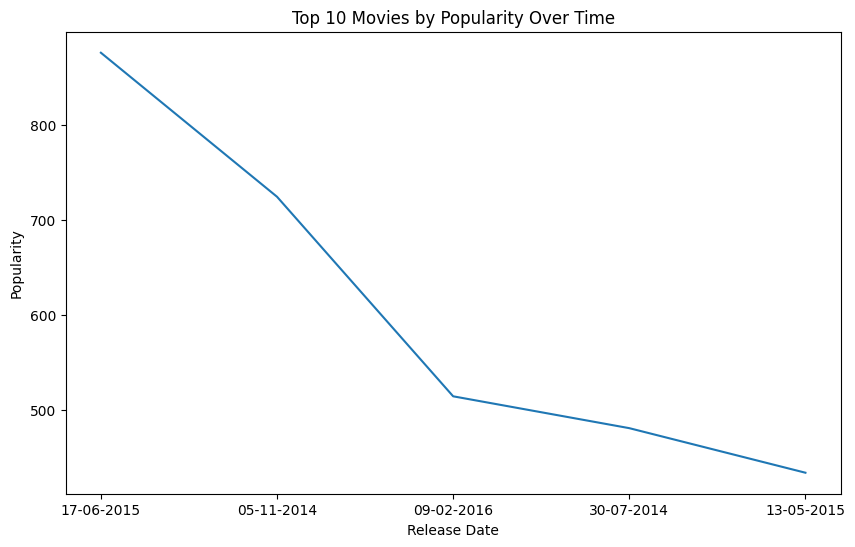

In [77]:
#Popularity Over Time (Top 5)
top_10_popular = df.nlargest(5, 'Movie_Popularity')
plt.figure(figsize=(10,6))
sns.lineplot(x='Movie_Release_Date', y='Movie_Popularity', data=top_10_popular)
plt.title('Top 10 Movies by Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.show()

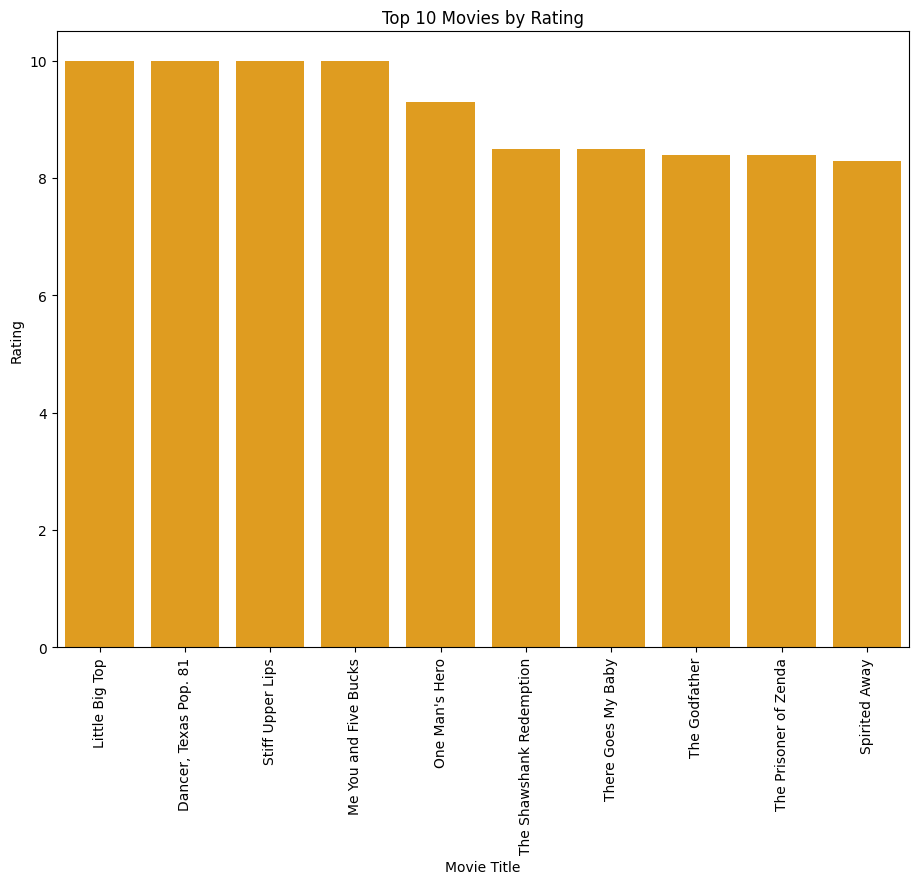

In [78]:
#Rating Distribution (Top 10)
top_10_rated = df.nlargest(10, 'Movie_Vote')
plt.figure(figsize=(11,8))
sns.barplot(x='Movie_Title', y='Movie_Vote', data=top_10_rated,color='orange')
plt.title('Top 10 Movies by Rating')
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

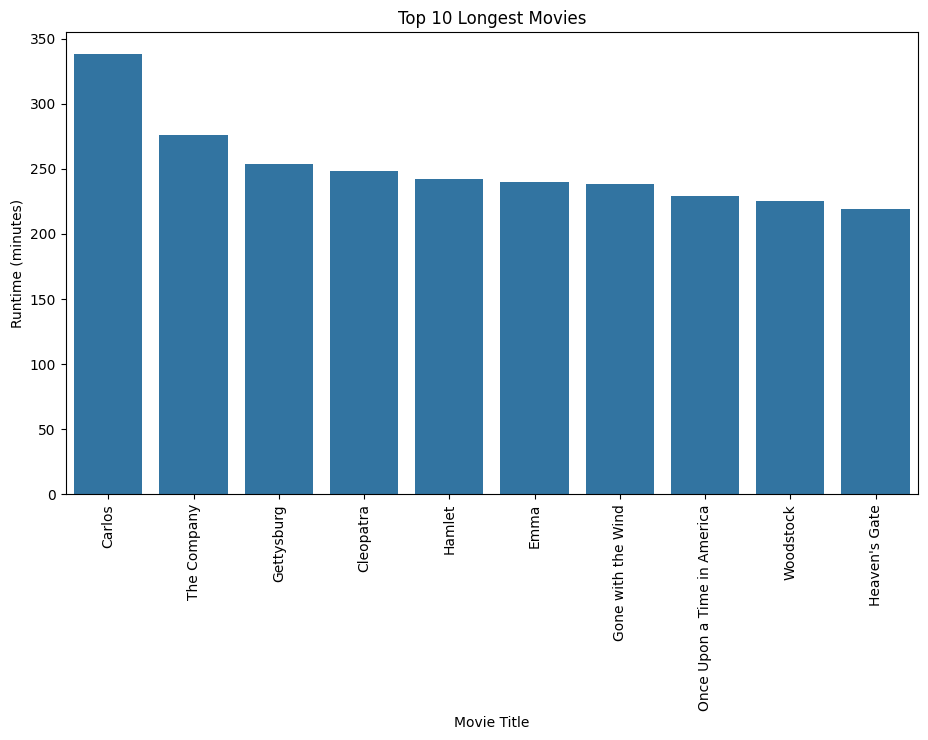

In [79]:
#Movie Length Distribution (Top 10)
top_10_longest = df.nlargest(10, 'Movie_Runtime')
plt.figure(figsize=(11,6))
sns.barplot(x='Movie_Title', y='Movie_Runtime', data=top_10_longest)
plt.title('Top 10 Longest Movies')
plt.xlabel('Movie Title')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=90)
plt.show()

# **Define Target Variable (y) and Feature Variables (X)**

--- Regression Model: Predicting Movie Revenue



In [211]:
y = df['Movie_Revenue']
x = df[['Movie_Budget', 'Movie_Runtime','Movie_Popularity']]

# **Train Test Split**

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
x.train,x.test,y.train,y.test=train_test_split(x,y,random_state=2529)

<ipython-input-213-1b72892df493>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.train,x.test,y.train,y.test=train_test_split(x,y,random_state=2529)


In [214]:
x.train.shape,x.test.shape,y.train.shape,y.test.shape

((3570, 3), (1190, 3), (3570,), (1190,))

# **Modeling**

In [215]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# **Model Evaluation**

In [216]:
# Preprocess the training data (if needed)
x_train_cleaned = x.train.dropna()
y_train_cleaned = y.train.loc[x_train_cleaned.index]

# Fit the model with the training data
model.fit(x_train_cleaned, y_train_cleaned)

LinearRegression()

**Prediction**

In [217]:
y.prd=model.predict(x.test)

# **Explaination**
- Built a movie recommendation system using machine learning algorithms
- Predicted movie revenue and recommended movies to users
